In [ ]:
from pathlib import Path
import os 
# add ../ to path
# added_path = os.path.abspath(str((Path.cwd().parent.parent / "lib")).__str__())
# if added_path not in os.sys.path:
#     os.sys.path.append(added_path)  

project_main_path = Path.cwd().parent.parent
assert project_main_path.name == 'EC523_Project_G'
added_path = os.path.abspath(project_main_path.__str__())
if added_path not in os.sys.path:
    os.sys.path.append(added_path)  



PHASE3_SCENE_DESCRIPTION_FILE = "./DATASET/PROCESSING_RECORD_PHASE3_SCENE_DESCRIPTION.json"
dataset_path = os.path.abspath(project_main_path) # adjust the path to the dataset
project_main_path = Path.cwd().parent


In [2]:
from pathlib import Path
import os
import importlib
import torch
from transformers import AutoTokenizer, PretrainedConfig
from matplotlib import pyplot as plt
import argparse
from lib import data
import importlib 
from lib import data as anime_data
importlib.reload(anime_data)
import torch

import importlib
importlib.reload(anime_data)

from torch.utils.data import DataLoader
from torchvision import transforms

In [3]:
MAX_NUM_FIGURE = 5
BATCH_SIZE = 4
DATASET_SHUFFLE = True

Start Loading Metadata...
series_name: cute
Finish Loading Metadata...
dict_keys(['scene_img', 'inpainting_img', 'figure_img_list', 'len_figure', 'description'])
len_train: 4136, len_test: 460
dataset_train: 4136, dataset_test: 460


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 In the image, a woman wearing a blue dress is standing in a room with a red chair. She appears to be looking at the chair, possibly considering whether to sit or not. The room also contains a dining table and a couch.

Previously, the woman had been engaged in a conversation with a man who was sitting on the red chair. They had been discussing various topics, and the man had been sharing his thoughts and opinions with the woman. The woman had been listening attentively, showing interest in the man's words.

As the conversation came to an end, the man had stood up from the chair, and the woman had been left standing in the room. She now seems to be contemplating her next move, possibly deciding whether to sit on the chair or continue with her day.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 In the scene, a young woman with purple hair is standing on a sidewalk, looking at a large building with a red roof. She is wearing a yellow jacket and has a backpack on. The woman appears to be contemplating her next move or destination.

Previously, the woman had been walking along the sidewalk, passing by a park with a few trees. She noticed a group of people sitting on a bench, engaged in a lively conversation. The woman felt drawn to join them, so she approached the group and introduced herself. The group welcomed her warmly, and they spent the next hour sharing stories and experiences.

As the sun began to set, the woman realized that she had spent more time than she initially intended. She decided to leave the group and continue her journey, but not before exchanging contact information with a few of the people she had met. She now stands on the sidewalk, reflecting on the connections she had made and the experiences she had gained during her walk.


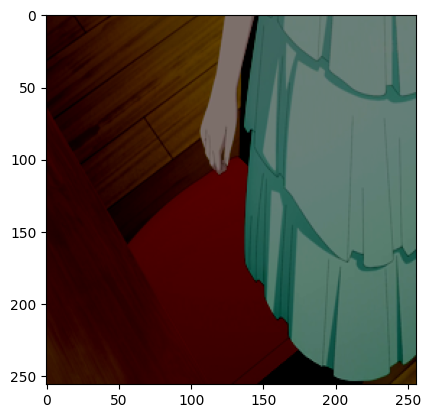

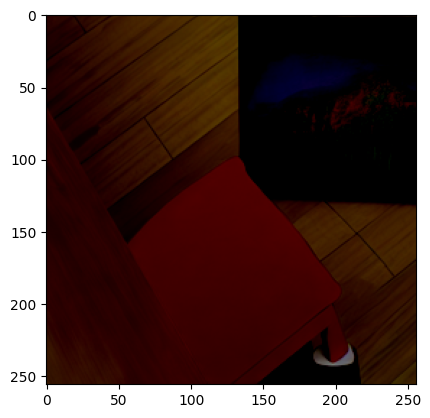

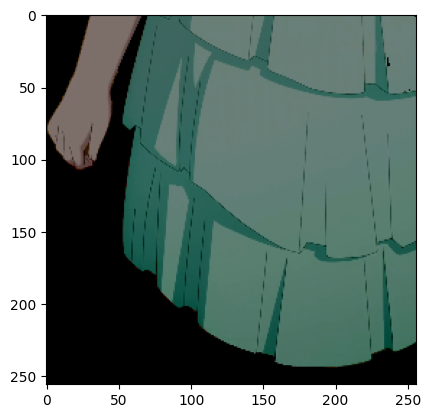

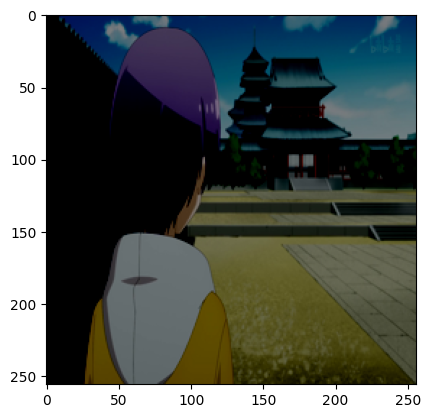

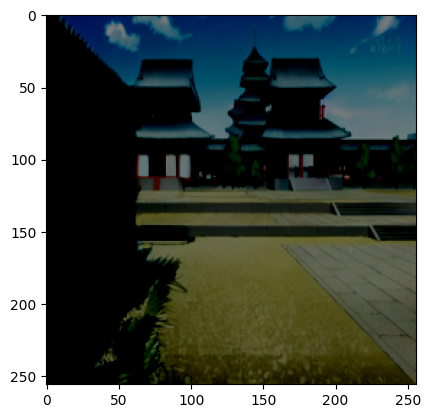

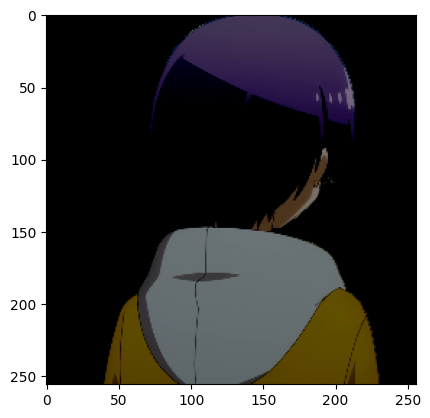

In [4]:
anime_figure_scene_dataset = anime_data.get_dataset(PHASE3_SCENE_DESCRIPTION_FILE, dataset_path=dataset_path, MAX_NUM_FIGURE=MAX_NUM_FIGURE)
# print(len(anime_figure_scene_dataset))
print(anime_figure_scene_dataset[0].keys())


# import torch
# from torch.utils.data import  DataLoader

len_dataset = len(anime_figure_scene_dataset)
len_train = int(0.9 * len_dataset)
len_test = len_dataset - len_train
print(f"len_train: {len_train}, len_test: {len_test}")
dataset_train = torch.utils.data.Subset(anime_figure_scene_dataset, range(0, len_train))
dataset_test = torch.utils.data.Subset(anime_figure_scene_dataset, range(len_train, len_dataset))
print(f"dataset_train: {len(dataset_train)}, dataset_test: {len(dataset_test)}")






dataloader_train = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=DATASET_SHUFFLE)
dataloader_test = DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=DATASET_SHUFFLE)

anime_data.display_data(dataloader_train, num_of_batch=1)
anime_data.display_data(dataloader_test, num_of_batch=1)


In [5]:
from start import init_train
from utils.images import SaveImages

# Loading models and the latest weights without loading the dataset
Trainer = init_train("configs/StyleGAN_256.json",dataloader_train, dataloader_test)
Trainer.train_loop()
# Save 1000 randomly generated images to the img/256_2 folder
SaveImages(Trainer, dir='img/256_2', cnt=1000)

Epoch 604/10000 D_loss: 0.32 G_loss: 0.87:   4%|▍         | 42/1034 [02:23<54:18,  3.28s/it]

real_img contains: dict_keys(['scene_img', 'inpainting_img', 'figure_img_list', 'len_figure', 'description'])
 In a lush green forest, two young women with long red hair were standing next to each other, enjoying the serene atmosphere. They had been friends since childhood and had spent countless hours exploring the woods together. One of the girls, wearing a purple shirt, was pointing at something in the distance, drawing the attention of the other girl.

As they gazed at the object, they noticed a small bird perched on a branch nearby. The girl in the purple shirt whispered to her friend, "Remember that time we found that bird's nest and we were so excited to see the baby birds hatch?" The other girl nodded, smiling at the memory.

Their friendship had grown stronger over the years, and they had faced many challenges together. They had shared their hopes and fears, and had supported each other through thick and thin. The girl in the purple shirt had always been there for her friend, 

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


 similarity is tensor([1.0000, 1.0000, 1.0000, 0.9701])
clip loss is -0.9925118684768677
 calculated clip loss-0.9925118684768677
Dloss at dis r1_loss tensor(0.5833, device='cuda:0', grad_fn=<AddBackward0>)
d_loss is  tensor(0.5833, device='cuda:0', grad_fn=<AddBackward0>)


Epoch 604/10000 D_loss: 0.32 G_loss: 0.87:   4%|▍         | 42/1034 [02:26<57:41,  3.49s/it]


KeyboardInterrupt: 

In [ ]:
from utils.images import TensorToImage

plot_width, plot_height = 6, 20
fig = plt.figure(figsize=(4 * plot_width, 4 * plot_height))

z = torch.randn((plot_width * plot_height, 256), device=Trainer.device)
for sample_n in range(1, plot_width * plot_height + 1):
    ax = fig.add_subplot(plot_height, plot_width, sample_n)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(TensorToImage(Trainer.G(z[sample_n - 1])[0].detach().cpu(), 0.5, 0.4))
    plt.title(sample_n - 1)